<a id='analysis'></a>
## Data Analysis

**Insights we might discover:**

1. What is the ranking of the breeds? Which get tweeted most often?

2. Account evolution - how did the account change (tweet frequency, length of tweets etc.)?

3. Is there a pattern for when the tweets are tweeted?

Additional questions.

4. What are the most common dog names?

5. What is the dog rating most used (mode)?

6. What dog type is most posted/rated (pupper, doggo etc.)?

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

**1. What is the ranking of the breeds? Which get tweeted most often?**

In [3]:
df_analysis = pd.read_csv('twitter_archive_master.csv')

In [4]:
df_analysis.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_type,breed,conf
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0,85,NaN,banana,0.076110
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712


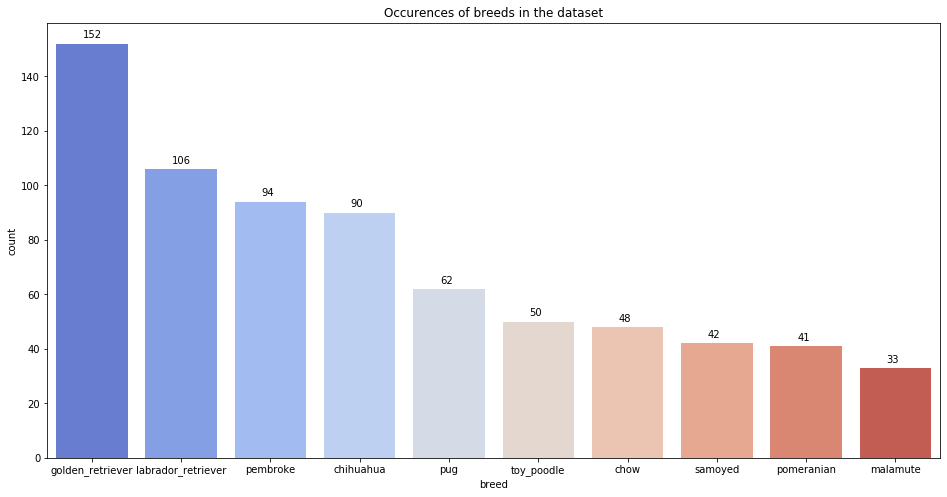

In [5]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'breed', data = df_analysis, order=df_analysis['breed'].value_counts().iloc[:10].index, palette = 'coolwarm')

for label in ax.patches:
    ax.annotate('{:.0f}'.format(label.get_height()), (label.get_x()+0.3, label.get_height()+2))
ax.set_title('Occurences of breeds in the dataset');

In [6]:
df_breed_group = df_analysis[['retweet_count', 'favorite_count', 'breed']].groupby('breed', as_index = False).sum()

In [7]:
df_breed_group.sort_values("retweet_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
130,golden_retriever,560818,1872500
171,labrador_retriever,405404,1265355
227,pembroke,291771,1038797
77,chihuahua,250722,743689
258,samoyed,203446,583906
121,french_bulldog,156230,570921
84,cocker_spaniel,145743,407412
79,chow,131025,446933
240,pug,118682,383817
305,toy_poodle,115330,337270


In [8]:
df_breed_group.sort_values("favorite_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
130,golden_retriever,560818,1872500
171,labrador_retriever,405404,1265355
227,pembroke,291771,1038797
77,chihuahua,250722,743689
258,samoyed,203446,583906
121,french_bulldog,156230,570921
79,chow,131025,446933
84,cocker_spaniel,145743,407412
240,pug,118682,383817
305,toy_poodle,115330,337270


In the above analysis (visually and tabular) we can see that retrievers are most often being tweeted, with Golden Retrievers being on rank 1 with 150 tweets and Labrador Retrievers rank 2 with 105 tweets. 

Additionally they are also on the top ranks with retweets and favourites! The Golden Retriever is leading with 560,818 retweets and a favourite count of 1,872,500. 

Followed by the Labrador Retriever with 405,404 retweets and a favourite count of 1,265,355!

In [9]:
df_breed_group['sum'] = df_breed_group['retweet_count'] + df_breed_group['favorite_count']

In [10]:
df_breed_group.sort_values("sum", ascending = False).head(10)

,breed,retweet_count,favorite_count,sum
130,golden_retriever,560818,1872500,2433318
171,labrador_retriever,405404,1265355,1670759
227,pembroke,291771,1038797,1330568
77,chihuahua,250722,743689,994411
258,samoyed,203446,583906,787352
121,french_bulldog,156230,570921,727151
79,chow,131025,446933,577958
84,cocker_spaniel,145743,407412,553155
240,pug,118682,383817,502499
305,toy_poodle,115330,337270,452600


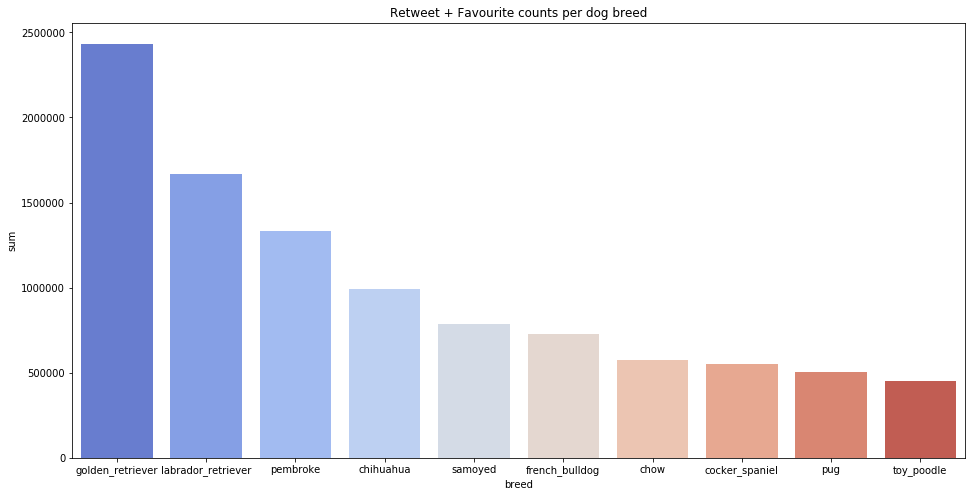

In [11]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'breed', y = 'sum', data = df_breed_group.sort_values('sum', ascending=False).iloc[:10], palette = 'coolwarm')

ax.set_title('Retweet + Favourite counts per dog breed');

The diagram above shows the retweets and favourites summed up. 

As we can see in the barchart the retrievers seem to be the most liked/tweeted dog breeds on twitter/on the twitter account!

**2. Account evolution - how did the account change (tweet frequency, length of tweets etc.)?**

In [12]:
df_time = df_analysis.copy()

In [13]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1961 non-null   int64  
 1   timestamp           1961 non-null   object 
 2   source              1961 non-null   object 
 3   text                1961 non-null   object 
 4   expanded_urls       1961 non-null   object 
 5   rating_numerator    1961 non-null   int64  
 6   rating_denominator  1961 non-null   int64  
 7   name                1961 non-null   object 
 8   retweet_count       1961 non-null   int64  
 9   favorite_count      1961 non-null   int64  
 10  jpg_url             1961 non-null   object 
 11  img_num             1961 non-null   int64  
 12  lower_text_range    1961 non-null   int64  
 13  upper_text_range    1961 non-null   int64  
 14  dog_type            293 non-null    object 
 15  breed               1961 non-null   object 
 16  conf  

In [14]:
df_time['timestamp'] = pd.to_datetime(df_time['timestamp'])

As the timestamp column got converted into a string again, we had to convert it back to a datetime object. 

Making it a datetime object makes accessing the details (hour, year, minute etc.) much more easier.

In [15]:
df_time['weekday'] = df_time['timestamp'].apply(lambda x: x.dayofweek)

In [16]:
df_time

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_type,breed,conf,weekday
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0,85,NaN,banana,0.076110,1
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,chihuahua,0.323581,1
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,chihuahua,0.716012,0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,labrador_retriever,0.168086,6
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0,120,NaN,miniature_pinscher,0.560311,0
1957,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0,137,NaN,rhodesian_ridgeback,0.408143,0
1958,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0,130,NaN,german_shepherd,0.596461,6
1959,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0,139,NaN,redbone,0.506826,6


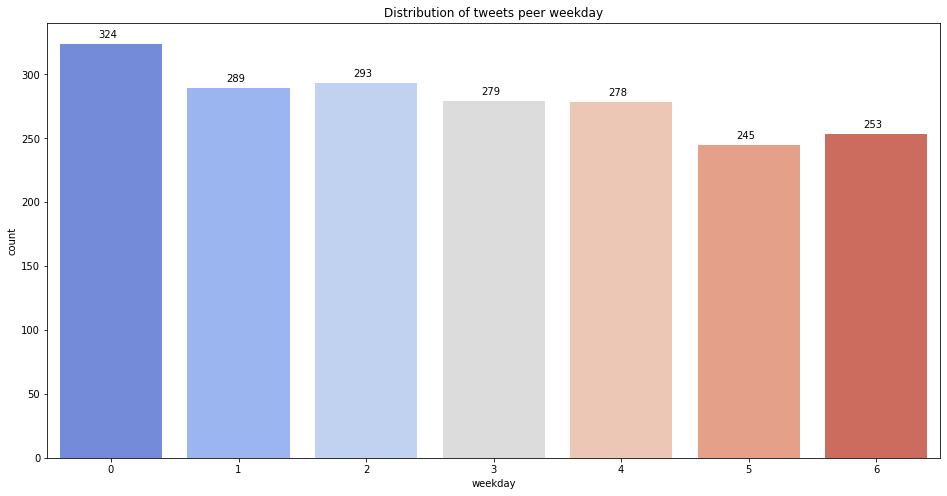

In [17]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'weekday', data = df_time, palette = 'coolwarm')

for label in ax.patches:
    ax.annotate('{:.0f}'.format(label.get_height()), (label.get_x()+0.3, label.get_height()+5))
ax.set_title('Distribution of tweets peer weekday');

The values for the x-axis are as follows:

0 = Monday

1 = Tuesday

etc.

Most tweets are being made on mondays (324 tweets), while tuesdays to fridays they are basically equal at around 285 in average. 

The tweet counts dips on weekends to around 250 in average.

In [18]:
df_time['timestamp'].min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [19]:
df_time['timestamp'].max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

Dataset starts in mid November 2015 and ends in August 2017.

In [20]:
df_time['month'] = df_time['timestamp'].apply(lambda x: x.month)
df_time['year'] = df_time['timestamp'].apply(lambda x: x.year)
df_time['hour'] = df_time['timestamp'].apply(lambda x: x.hour)

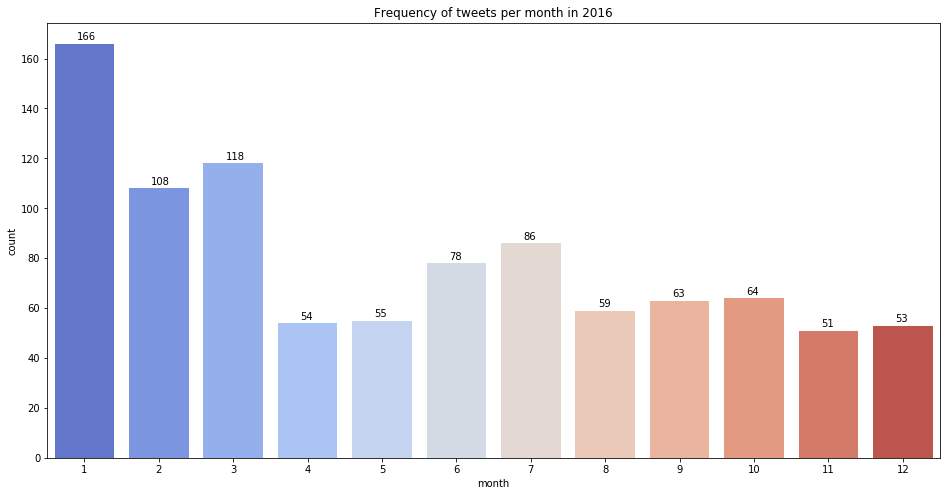

In [21]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'month', data = df_time.query('year == 2016'), palette = 'coolwarm')

for label in ax.patches:
    ax.annotate('{:.0f}'.format(label.get_height()), (label.get_x()+0.3, label.get_height()+1.5))
ax.set_title('Frequency of tweets per month in 2016');

The above barchart shows us the distribution of tweets per month for the year 2016. 

The trend seems to be that the tweets are decreasing over time. Let's check the whole dataset.

In [22]:
df_time['month_year'] = pd.to_datetime(df_analysis['timestamp']).dt.to_period('M')

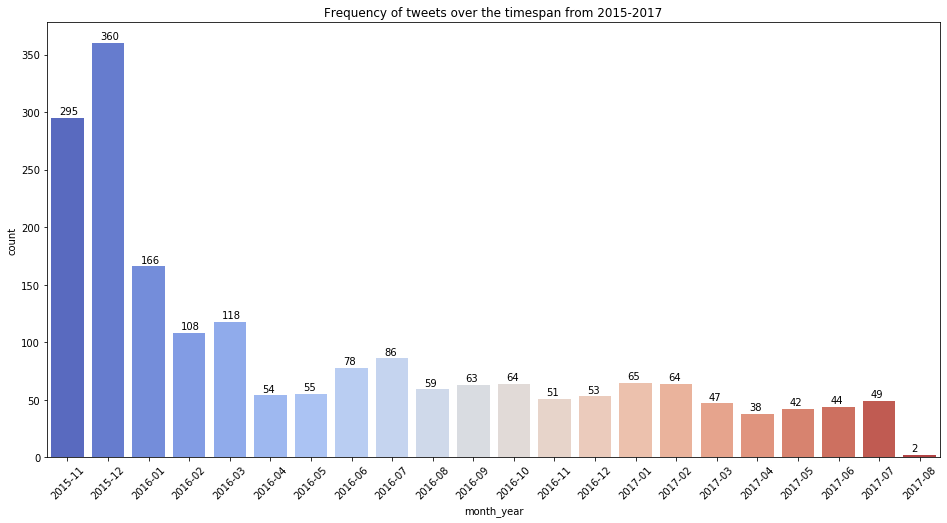

In [23]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'month_year', data = df_time.sort_values('month_year'), palette = 'coolwarm', )

for label in ax.patches:
    ax.annotate('{:.0f}'.format(label.get_height()), (label.get_x()+0.2, label.get_height()+3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Frequency of tweets over the timespan from 2015-2017');

The whole timeline makes it clear, that in the beginning the tweet count was up to 7 times higher than now (360 in December 2015).

Now the tweet count averages at about 55 tweets per month.

In [24]:
df_time_groupby = df_time.groupby('month_year', as_index = False).sum()

In [25]:
df_time_groupby.head()

,month_year,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,lower_text_range,upper_text_range,conf,weekday,month,year,hour
0,2015-11,1.972665e+20,3031.0,2942.0,159778.0,365811.0,298.0,0.0,36182.0,112.943165,868.0,3245.0,594425.0,2544.0
1,2015-12,2.433672e+20,3670.0,3780.0,546120.0,1266631.0,390.0,0.0,41475.0,153.470412,1006.0,4320.0,725400.0,3209.0
2,2016-01,1.142157e+20,1782.0,1761.0,252256.0,662452.0,184.0,0.0,19533.0,75.340969,514.0,166.0,334656.0,1337.0
3,2016-02,7.552054e+19,1174.0,1150.0,173784.0,465281.0,128.0,0.0,12646.0,51.789728,297.0,216.0,217728.0,949.0
4,2016-03,8.371601e+19,1419.0,1370.0,194789.0,547351.0,138.0,0.0,13934.0,63.475336,342.0,354.0,237888.0,1055.0


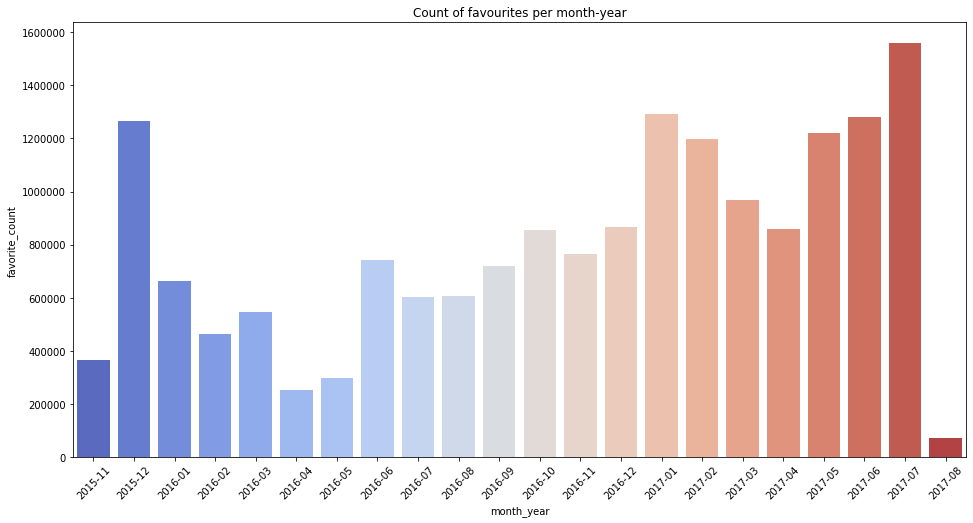

In [26]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'month_year', y = 'favorite_count', data = df_time_groupby, palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Count of favourites per month-year');

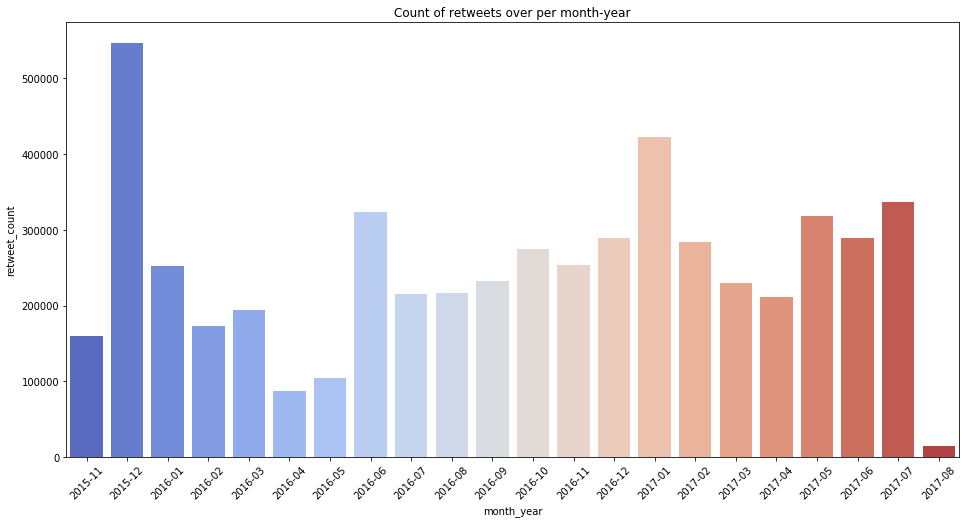

In [27]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'month_year', y = 'retweet_count', data = df_time_groupby, palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Count of retweets over per month-year');

Although the frequency of tweets decreases, the favourite and retweet count is increasing. 

Looks like the account gained enough popularity in the beginning and afterwards it grew on it's own over time! 

In this case it shows, that quality > quantity!

In [28]:
df_time_groupby_mean = df_time.groupby('month_year', as_index = False).mean()

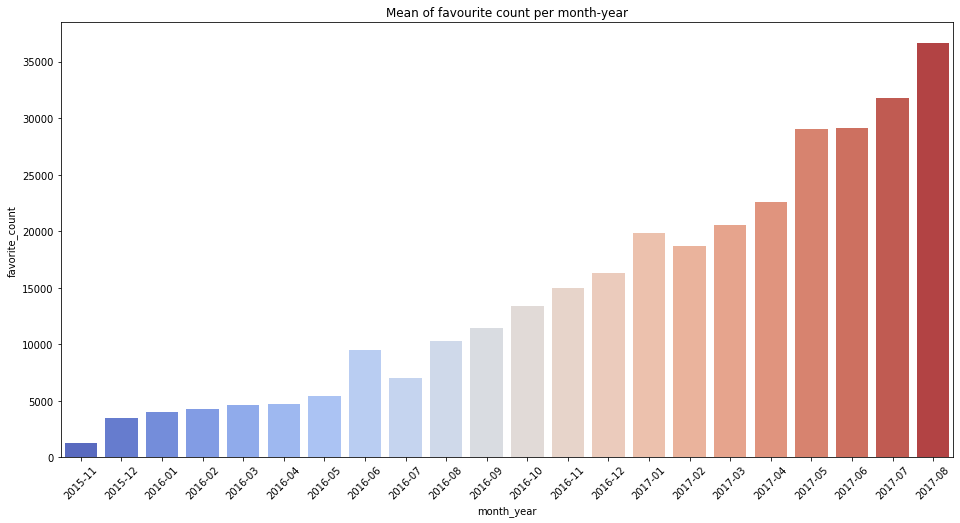

In [29]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'month_year', y = 'favorite_count', data = df_time_groupby_mean, palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Mean of favourite count per month-year');

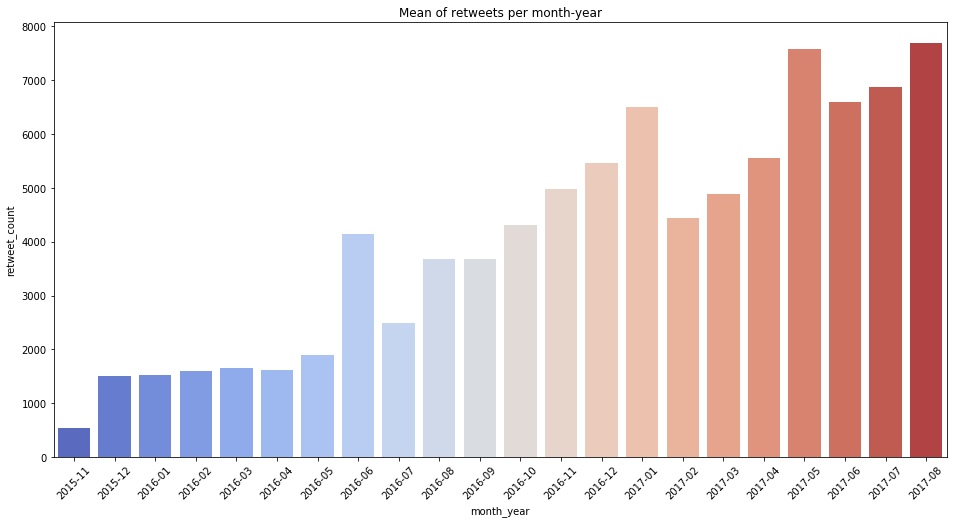

In [30]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'month_year', y = 'retweet_count', data = df_time_groupby_mean, palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Mean of retweets per month-year');

The barchart shows the average retweets per month for each year in the dataset.

The average numbers make it clear that there is an increase in retweets and favourite count over time!

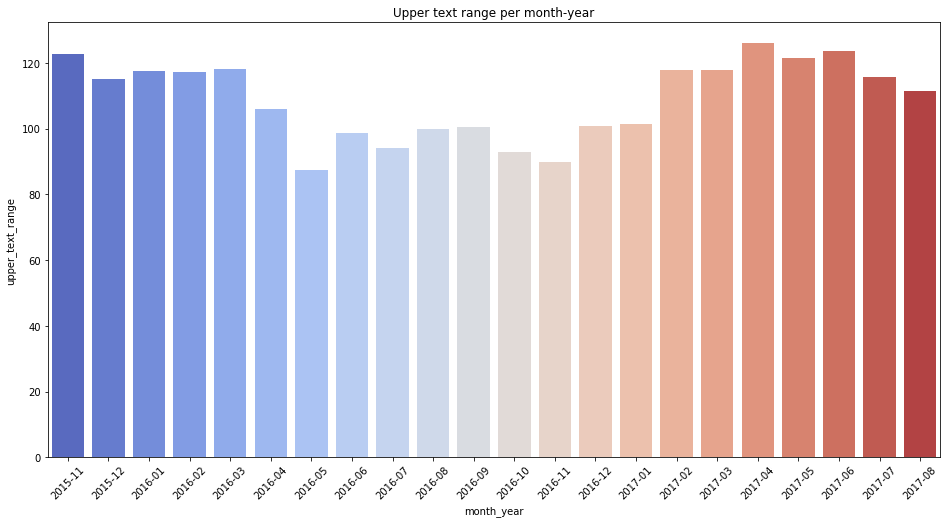

In [31]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'month_year', y = 'upper_text_range', data = df_time_groupby_mean, palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Upper text range per month-year');

The text length or the upper text range has stayed mostly the same, with a slight dip from June 2016 to January 2017. 

Afterwards it got the same level as before June 2016.

**3. Is there a pattern for when the tweets are tweeted?**

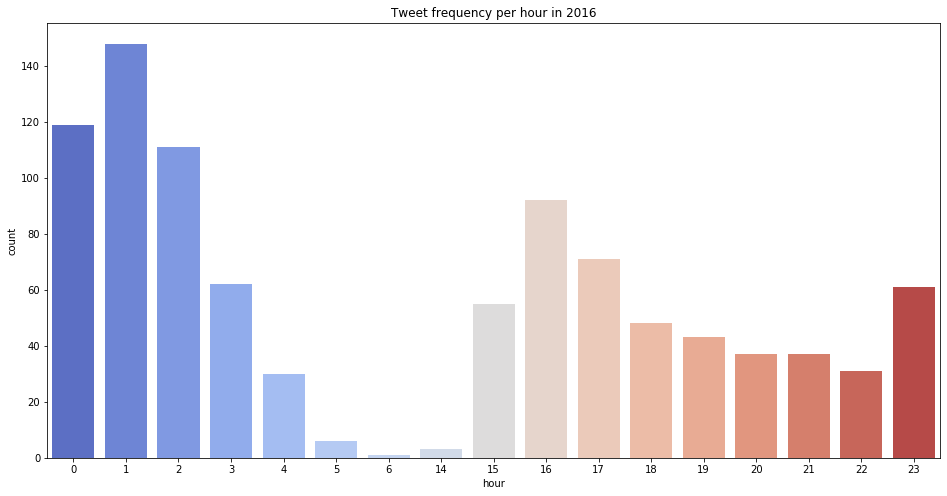

In [32]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'hour', data = df_time.query('year == 2016'), palette = 'coolwarm')
ax.set_title('Tweet frequency per hour in 2016');

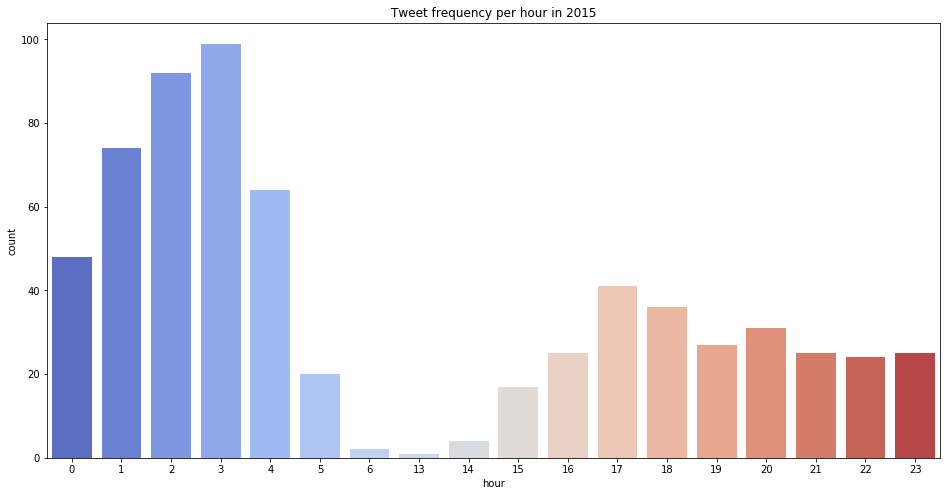

In [33]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'hour', data = df_time.query('year == 2015'), palette = 'coolwarm')
ax.set_title('Tweet frequency per hour in 2015');

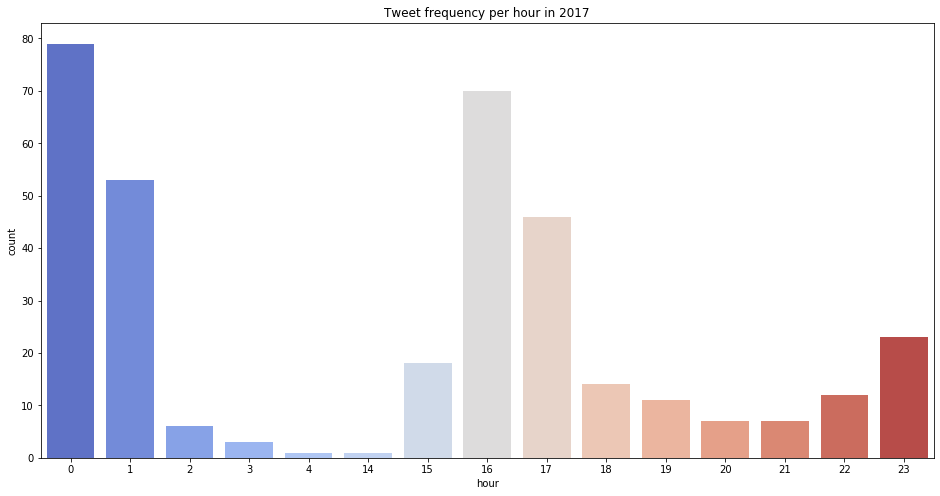

In [34]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'hour', data = df_time.query('year == 2017'), palette = 'coolwarm')
ax.set_title('Tweet frequency per hour in 2017');

While years 2015 and 2016 are very similar to each other there is a difference during hours 0-4. 

While in 2016 it peaks at 1 am and then decreases in 2015 it increases from 0 with a peak at 3 am. Additionally there is a peak at 16 in 2016 the peak seems to be at 17 in 2015. 

The hours from 7-14 don't have entries at all, which means there hasn't been any tweets in that timespan.

2017 differs from 2015 and 2016, as the peak in the nighthours is at 0 am and decreases quickly then. 

Then there is a strong peak at 16 with a quick decrease again. 

This could be because the year 2017 is not finished yet (in the dataset at least), which make outliers much more noticeable.

**4. What are the most common dog names?**

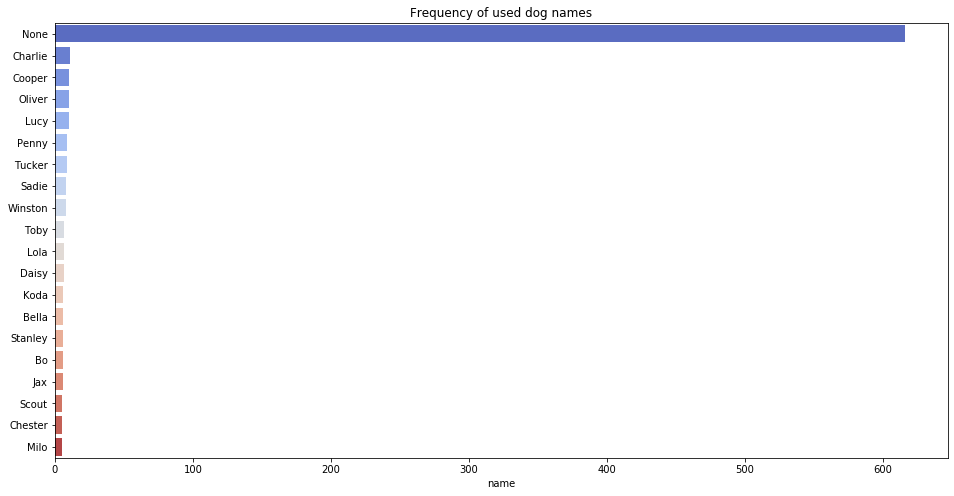

In [35]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x=df_analysis['name'].value_counts().iloc[:20], y=df_analysis['name'].value_counts().iloc[:20].index, palette = 'coolwarm')
ax.set_title('Frequency of used dog names');

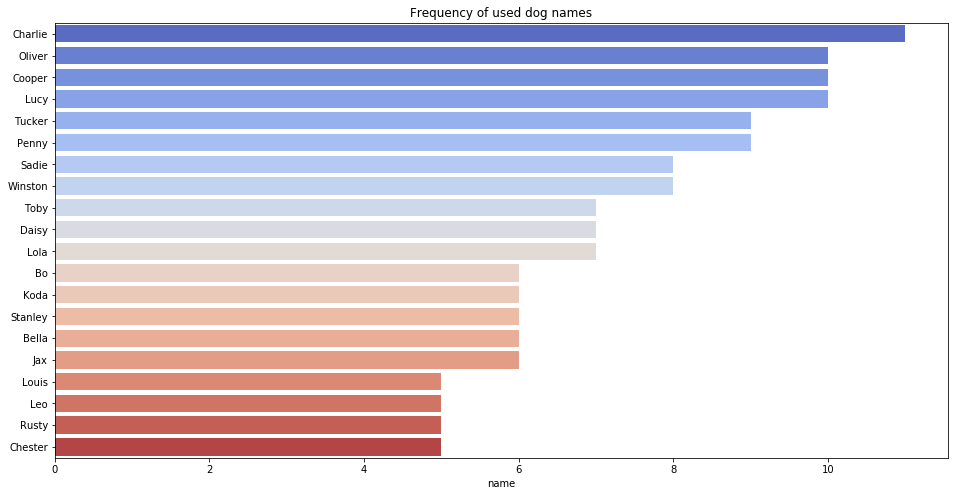

In [39]:
fig, ax = plt.subplots(figsize = (16,8))
df_with_names = df_analysis.query('name != "None"')
ax = sns.barplot(x=df_with_names['name'].value_counts().iloc[:20], y=df_with_names['name'].value_counts().iloc[:20].index, palette = 'coolwarm')
ax.set_title('Frequency of used dog names');

As we can see above, there are a big number of tweets which do not have a dog name associated (more than 600!).

If we ignore those entries we can see that people tend to call their dogs Charlie, Cooper or Lucy, followed by Oliver, Tucker and Penny most often.

The count for those names is quite low compared to the unnamed dogs (Charlie occurs 12 times, but unnamed dogs exist more than 600 times!).

**5. What is the dog rating most used (mode)?**

In [36]:
df_analysis['rating_numerator'].astype(int).value_counts()

12      441
10      416
11      391
13      251
9       150
8        95
7        52
14       33
5        32
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

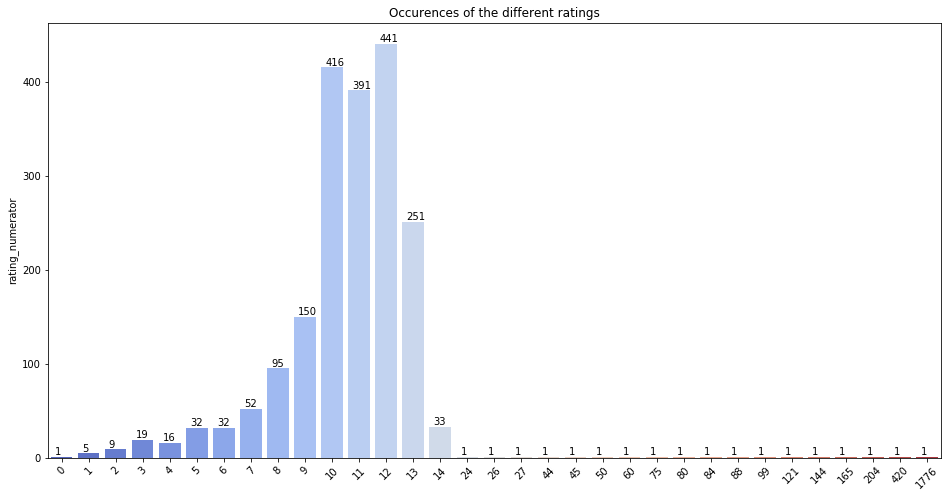

In [37]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x=df_analysis['rating_numerator'].astype(int).value_counts().index, y=df_analysis['rating_numerator'].astype(int).value_counts(), palette = 'coolwarm')

for label in ax.patches:
    ax.annotate('{:.0f}'.format(label.get_height()), (label.get_x() + 0.15, label.get_height()+2))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Occurences of the different ratings');

We can see that the most often used rating (numerator) is 12, followed by 11 and 10. 

We have to note that the "correct" scale only goes from one-to-ten... usually.

But it seems that most dogs in the dataset are rated very high (let's be honest, who doesn't rate dogs high?).

**6. What dog type is most posted/rated (pupper, doggo etc.)?**

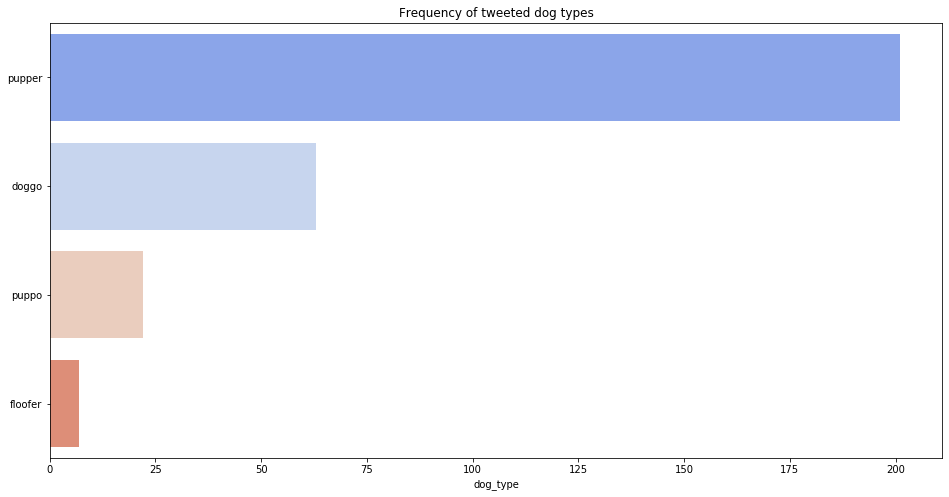

In [38]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x=df_analysis['dog_type'].value_counts(), y=df_analysis['dog_type'].value_counts().index, palette = 'coolwarm')
ax.set_title('Frequency of tweeted dog types');

We can see that puppers are by far the most tweeted dog type, followed by a doggo. This is no surprise, as people love puppies.